## B cells versus T cells
The data used in this notebook is lymphocyte data for one patient's B cells and T cells. We use this data to show the proteome variation between the cell types. Here, we note presence/absense changes and quantify fold changes using a T test.


### Access data
First, we import our data package. This brings the functions defined there into scope so we can use them in this script. Then we can create a proteomic dataset object and store it as <code>prot</code>. You can select versions and subjects with <code>load_dataset</code>.

Calling <code>head</code> shows the first several lines of the dataframe, which provides an idea of the type of data present and the structure of the dataframe.

In [1]:
import longitudinalCLL
prot = longitudinalCLL.get_proteomic()
prot.load_dataset(version='July_noMBR_FP', subjects = [2])


prot.data_raw.head()

,Subject2_B_cells_062920_E_11,Subject2_B_cells_062920_E_12,Subject2_B_cells_062920_E_13,Subject2_B_cells_062920_E_16,Subject2_B_cells_062920_E_9,Subject2_B_cells_072920_E_1,Subject2_B_cells_072920_E_2,Subject2_B_cells_072920_E_4,Subject2_B_cells_072920_E_5,Subject2_B_cells_072920_E_7,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,0.0,0.0,0.0,0.0,4099050.2,4933454.5,4998927.5,5152668.5,2474851.0,4542057.0,...,0.0,4905873.00,0.0,3405266.0,4656720.00,1673629.9,6060600.5,2407679.5,7791855.0,5542659.50
A0AVT1,2085089.5,2154074.2,0.0,2266665.2,0.0,0.0,1019033.0,3165020.8,1684720.6,1906287.2,...,1091121.4,630647.25,576871.9,0.0,0.00,0.0,0.0,827356.1,1260652.0,0.00
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1514363.4,866311.94,0.0,0.0,0.00,0.0,0.0,0.0,653698.6,879074.56
A6NHR9,3540237.5,2421284.0,2306652.0,2554028.8,666470.9,1914117.8,1527918.9,2105808.0,1398487.1,2037837.5,...,0.0,0.00,0.0,0.0,430484.97,0.0,0.0,0.0,538303.6,948190.40
A8K2U0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


Our next steps will require separating the runs by cell type, to compare B cells to T cells. As you see above, the pattern for naming the columns is "Intensity ", B or T indicating cell type, and the replicate number. Here we define the list of cell types that the functions should look for based on the naming pattern.

In [2]:
cell_types=['Subject2_B_cells_062920', 'Subject2_T_cells_062920']

Here we record which proteins are only identified in one cell type. We'll set these aside for now, in the <code>data_in_one_type</code> dataframe.

For our analysis, present in more than half, or at least 3 out of 5 replicates, is considered clear although it is interesting to note those proteins identified in all replicates of one type.

In [3]:
present_only_in = prot.check_presence_absence(min_reps=3, cell_types=cell_types, null_value=0).dropna()

print("Proteins identified only in:")
print(present_only_in.value_counts())
data_in_one_type =prot.data_frame.loc[present_only_in.index]
data_in_one_type['Type'] = present_only_in

Proteins identified only in:
Subject2_T_cells_062920    100
Subject2_B_cells_062920     58
dtype: int64


The <code>min_reps</code> is the minimum number of replicates required to list a protein as present in one type. This can be changed, i.e., <code>min_reps=5</code> to determine the proteins identified in all 5 replicates of a single type; do not set it to a number greater than the replicates run or no proteins will be returned.

In [4]:
present_5of5_only_in = prot.check_presence_absence(min_reps=5, cell_types=cell_types, null_value=0).dropna()

In [5]:
print("Proteins identified in 5/5 replicates only in:")
print(present_5of5_only_in.value_counts())
data_in_5of5_one_type =prot.data_frame.loc[present_5of5_only_in.index]
data_in_5of5_one_type['Type'] = present_5of5_only_in

Proteins identified in 5/5 replicates only in:
Subject2_T_cells_062920    52
Subject2_B_cells_062920    32
dtype: int64


Next, we select the proteins that are measured in at least three samples from each group, allowing the calculations to proceed without imputed zero-handling.

In [6]:
indecies = prot.check_n_of_each_type(cell_types=cell_types, null_value=0)
prot.data_frame = prot.data_frame[indecies]

In [7]:
print ("Total groups identified:")
print(prot.data_raw.shape[0])

print ("\nTotal groups identified and present at least once:")
print (prot.data_frame.dropna(axis=0, how='all').shape[0])

print ("\nProteins identified in at least 3 of each cell type:\t")
print (prot.data_frame.shape[0])

Total groups identified:
2426

Total groups identified and present at least once:
1046

Proteins identified in at least 3 of each cell type:	
1046


Before any analysis, we log normalize and median normalize across runs. We need to do this after filtering for consistently expressed proteins so those only identified in some rows do not throw off the normalization.

In [8]:
prot.normalize()

,Subject2_B_cells_062920_E_11,Subject2_B_cells_062920_E_12,Subject2_B_cells_062920_E_13,Subject2_B_cells_062920_E_16,Subject2_B_cells_062920_E_9,Subject2_B_cells_072920_E_1,Subject2_B_cells_072920_E_2,Subject2_B_cells_072920_E_4,Subject2_B_cells_072920_E_5,Subject2_B_cells_072920_E_7,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0AVT1,-1.670136,-1.680642,NaN,-1.574178,NaN,NaN,-2.627282,-1.020830,-2.010498,-1.940336,...,-2.591157,-3.371917,-3.553944,NaN,NaN,NaN,NaN,-2.914374,-2.289272,NaN
A8MWD9,-3.701819,-0.937772,-1.214828,NaN,-1.662622,-1.741258,-3.491627,-1.798249,NaN,-1.653455,...,NaN,NaN,NaN,-1.267757,-0.276231,-1.322678,-1.664920,-4.420327,-1.507849,NaN
O00148,1.693574,1.700426,1.662802,1.372640,1.519427,1.042515,1.320038,1.535430,1.376422,1.601773,...,1.427041,1.097760,1.688793,1.403212,1.563454,1.381148,1.313064,1.306506,1.479674,1.387579
O00151,0.596515,0.780624,0.758822,0.869894,-0.043899,0.321118,0.942312,0.838104,0.765770,0.710423,...,-0.686724,-1.939470,-1.093229,-1.489591,NaN,-1.355552,-1.250138,-0.761256,-1.756273,-1.202455
O00170,NaN,-1.897459,-2.380336,-1.880314,-1.944056,-1.734878,-1.841008,-1.110567,-1.813084,-1.243412,...,-1.056491,-1.274764,-1.520908,-1.635468,-0.839683,-0.831564,-0.809073,-1.190120,-0.858958,-0.899809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q15388,-0.816950,NaN,-2.625430,-1.513226,-1.636781,-1.640037,-2.278066,-2.708258,-2.197378,-2.465452,...,NaN,-1.897097,-1.040864,-2.663218,NaN,NaN,NaN,NaN,NaN,NaN
Q6BDS2,3.203340,3.591639,3.486919,NaN,4.488387,2.418778,2.462702,2.854348,1.238070,2.886338,...,4.390041,4.528466,NaN,4.586621,2.708589,1.232846,1.956869,NaN,2.242251,0.950886
Q8NDC0,NaN,-1.947192,-1.627740,NaN,-1.478107,-1.880272,-1.721305,-0.976482,-2.007751,-1.400382,...,-7.128061,-2.343878,-2.413285,NaN,-1.663932,-1.912806,-1.936389,-2.144883,-1.196442,-1.254614


### Analysis

Now we calulate p values using a ttest. 

In [9]:
#Call ttest function
tstats = prot.ttest_wrapper(cell_types=cell_types)

Here we calculate fold change.

In [10]:
comparison_key = 'log2(B)-log2(T)'

tstats[comparison_key] = prot.get_fold_changes(cell_types=cell_types)

Fold change and p values allow us to create a volcano plot.

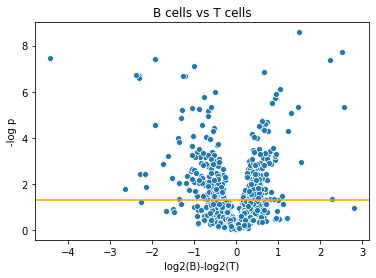

In [11]:
#graph volcano
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log10
tstats['-log p'] = -log10(tstats['pvalue'])

figure = sns.scatterplot(x=comparison_key,y='-log p',data=tstats)

figure.set_title("B cells vs T cells")
#plt.axvline(1, color ='orange')
#plt.axvline(-1, color ='orange')
plt.axhline(-log10(.05), color ='orange')
plt.show()

Next we will identify the altered proteins.

In [12]:
altered = prot.is_altered(tstats, pvalue=.05,
                          change_factor=False,
                          change_col=comparison_key, 
                          cell_types=cell_types)

In [13]:
#altered = prot.is_altered(tstats, pvalue=.05, change_factor=False,
 #                         change_col=fc_comp, cell_types=cell_types)

These are significantly altered (p<0.01) without restricting by the magnitude of change:

In [14]:
altered.value_counts()

Subject2_T_cells_062920    135
Subject2_B_cells_062920    133
dtype: int64

In [15]:
print("Here are counts for other p and change cutoffs:")
print("P<0.05, >150% of the other type")
print(prot.is_altered(tstats, pvalue=.05,change_factor=1.5).value_counts()) #50% increase from either
print("\nP<0.05, >200% of the other type")
print(prot.is_altered(tstats, pvalue=.05,change_factor=2).value_counts()) #Double
print("\nP<0.05, >500% of the other type")
print(prot.is_altered(tstats, pvalue=.05,change_factor=5).value_counts()) #5 times larger

print("\nP<0.01, >150% of the other type")
print(prot.is_altered(tstats, pvalue=.01,change_factor=1.5).value_counts()) #50% increase from either
print("\nP<0.01, >200% of the other type")
print(prot.is_altered(tstats, pvalue=.01,change_factor=2).value_counts()) #Double
print("\nP<0.01, >500% of the other type")
print(prot.is_altered(tstats, pvalue=.01,change_factor=5).value_counts()) #5 times larger

Here are counts for other p and change cutoffs:
P<0.05, >150% of the other type
T cells    82
B cells    49
dtype: int64

P<0.05, >200% of the other type
T cells    33
B cells    11
dtype: int64

P<0.05, >500% of the other type
T cells    3
B cells    2
dtype: int64

P<0.01, >150% of the other type
T cells    65
B cells    36
dtype: int64

P<0.01, >200% of the other type
T cells    29
B cells     9
dtype: int64

P<0.01, >500% of the other type
T cells    2
B cells    2
dtype: int64


### Differentially expressed proteins

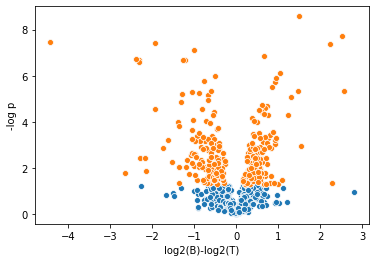

In [16]:
figure = sns.scatterplot(x=comparison_key,y='-log p',data=tstats)
figure2 = sns.scatterplot(x=comparison_key,y='-log p',
                          data=tstats.loc[altered.index])
plt.rc('axes',labelsize=16)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.title("B cells vs T cells", fontsize=20)
#plt.savefig('data/B_v_T.png')

This shows the differentially expressed proteins. Recall that this dataset is restricted to those expressed in at least three of each cell type.

The next step is to identify those proteins by name. Here we get the protein names from the fasta file, which remain the same regardless of which software the data was quantified using.


*Note that this function doesn't really have a place in the new set up yet.*

In [17]:
import pandas as pd
def load_fasta(file="data/uniprot-filtered-proteome_3AUP000005640_reviewed_human.fasta"):
    
    #file is formated:
    #>sp|Q96IY4|CBPB2_HUMAN Carboxypeptidase B2 OS=Homo sapiens OX=9606 GN=CPB2 PE=1 SV=2
    #MKLCS...
    headings = {}
    with open(file) as f:
        for line in f:
            if line.startswith('>'):#header line
                ID = line.split('|')[1]
                name=line.split('|')[2].split('=')[0].strip('OS')
                headings[ID]=name
    headings = pd.Series(list(headings.values()), index=headings.keys())
    
    return headings

In [18]:
protein_names = load_fasta()

In [19]:
import pandas as pd
protein_names_by_group={}
for ID in prot.data_raw.index:
    if ';' in ID:
        ids = ID.split(';')
        names=''
        for i in ids:
            if i in protein_names.index:
                names=names + protein_names[i] + ';'
        names = names[:-1]
        protein_names_by_group[ID] = names
    else:
        if ID in protein_names.index:
            protein_names_by_group[ID]=protein_names[ID]
protein_names_by_group = pd.Series(list(protein_names_by_group.values()), index=protein_names_by_group.keys())

Here we add the names to the <code>tstats</code> dataframe, which contains the fold changes for each protein. Then we can list the proteins that are altered. Optionally, use <code> head()</code> to display the first few or <code>to_csv</code> to write out to a file. We now split up the proteins heightened in B cells from those heightened in T cells.

In [20]:
tstats['Name']=protein_names_by_group
tstats['GeneID'] = tstats.Name.apply(lambda n: str(n).split('_HUMAN')[0])

altered_proteins = tstats.loc[altered.index].sort_values('log2(B)-log2(T)',
                        ascending=False)[['Name','GeneID','log2(B)-log2(T)','pvalue']]
higher_in_B_cells = altered_proteins.loc[altered_proteins['log2(B)-log2(T)'] >0]
higher_in_T_cells = altered_proteins.loc[altered_proteins['log2(B)-log2(T)'] <0]

#To write out to a file, use:
#altered_proteins.to_csv('data/filename.tsv', sep='\t')

Next we do the same for those only identified in one cell type.

In [21]:
data_in_one_type['Name'] = protein_names_by_group
data_in_one_type['GeneID']=data_in_one_type.Name.apply(lambda n: str(n).split('_HUMAN')[0])

B_cell_only_geneset = data_in_one_type[(data_in_one_type.Type==cell_types[0])]
T_cell_only_geneset= data_in_one_type[(data_in_one_type.Type==cell_types[1])]

### Proteins Higher in B Cells:

In [22]:
higher_in_B_cells

,Name,GeneID,log2(B)-log2(T),pvalue
Protein ID,,,,
P01877,IGHA2_HUMAN Immunoglobulin heavy constant alph...,IGHA2,2.559955,4.591137e-06
P01876,IGHA1_HUMAN Immunoglobulin heavy constant alph...,IGHA1,2.512508,1.943299e-08
P50213,IDH3A_HUMAN Isocitrate dehydrogenase [NAD] sub...,IDH3A,2.274145,4.470790e-02
P09960,LKHA4_HUMAN Leukotriene A-4 hydrolase,LKHA4,2.248666,4.064618e-08
P0DOY2,IGLC2_HUMAN Immunoglobulin lambda constant 2,IGLC2,1.550401,1.143973e-03
...,...,...,...,...
P25705,"ATPA_HUMAN ATP synthase subunit alpha, mitocho...",ATPA,0.204812,4.991120e-02
P11166,"GTR1_HUMAN Solute carrier family 2, facilitate...",GTR1,0.195953,2.449642e-02
P15311,EZRI_HUMAN Ezrin,EZRI,0.164767,3.106399e-02


### Proteins Only in B Cells:

In [23]:
B_cell_only_geneset[['Name', 'GeneID']]

,Name,GeneID
Protein ID,,
A6NHR9,MHD1_HUMAN Structural maintenance of chromosom...,MHD1
O43598,DNPH1_HUMAN 2'-deoxynucleoside 5'-phosphate N-...,DNPH1
O60262,GBG7_HUMAN Guanine nucleotide-binding protein ...,GBG7
O60664,PLIN3_HUMAN Perilipin-3,PLIN3
O95865,"DDAH2_HUMAN N(G),N(G)-dimethylarginine dimethy...",DDAH2
P01871,IGHM_HUMAN Immunoglobulin heavy constant mu,IGHM
P06340,DOA_HUMAN HLA class II histocompatibility anti...,DOA
P09917,LOX5_HUMAN Arachidonate 5-lipoxygenase,LOX5
P11049,CD37_HUMAN Leukocyte antigen CD37,CD37


### Proteins higher or only in B cells by GeneID
<code>B_cell_set</code> is defined here as both the above lists of names, those higher or only in B cells.

In [24]:
B_cell_set = list(higher_in_B_cells.GeneID)+list(B_cell_only_geneset.GeneID)

### Proteins Higher in T Cells:

In [25]:
higher_in_T_cells.sort_values('log2(B)-log2(T)',ascending=True)

,Name,GeneID,log2(B)-log2(T),pvalue
Protein ID,,,,
P26447,10A4_HUMAN Protein S100-A4,10A4,-4.444792,3.330943e-08
Q9H9B4,FXN1_HUMAN Sideroflexin-1,FXN1,-2.652829,1.627324e-02
P21333,FLNA_HUMAN Filamin-A,FLNA,-2.394465,1.935575e-07
O14745,NHRF1_HUMAN Na(+)/H(+) exchange regulatory cof...,NHRF1,-2.320671,2.158804e-07
P06703,10A6_HUMAN Protein S100-A6,10A6,-2.312247,2.625264e-07
...,...,...,...,...
P06753,TPM3_HUMAN Tropomyosin alpha-3 chain,TPM3,-0.303909,2.342833e-03
P47755,CAZA2_HUMAN F-actin-capping protein subunit al...,CAZA2,-0.286024,4.213220e-02
Q16698,"DECR_HUMAN 2,4-dienoyl-CoA reductase, mitochon...",DECR,-0.282424,4.584146e-02


### Proteins Only in T Cells:

In [26]:
T_cell_only_geneset[['Name', 'GeneID']]

,Name,GeneID
Protein ID,,
A0FGR8,ESYT2_HUMAN Extended synaptotagmin-2,ESYT2
O14579,COPE_HUMAN Coatomer subunit epsilon,COPE
O15117,FYB1_HUMAN FYN-binding protein 1,FYB1
O43772,MCAT_HUMAN Mitochondrial carnitine/acylcarniti...,MCAT
O60496,DOK2_HUMAN Docking protein 2,DOK2
...,...,...
O43324,MCA3_HUMAN Eukaryotic translation elongation f...,MCA3
P04234,CD3D_HUMAN T-cell surface glycoprotein CD3 del...,CD3D
P05814,CASB_HUMAN Beta-casein,CASB


### Proteins higher or only in T cells by GeneID
<code>T_cell_set</code> is defined here as both the above lists of names, those higher or only in T cells.

In [27]:
T_cell_set = list(higher_in_T_cells.GeneID)+list(T_cell_only_geneset.GeneID)

## Suplementary Table: Distinguished Proteins
Here we combine the data from the four categories in one dataframe and output it to a tab-separated file.

First, we get the names ofthe distinguished proteins.

In [28]:
distinguished_proteins = pd.concat([data_in_one_type[["GeneID"]],
                                   altered_proteins[["GeneID", "log2(B)-log2(T)", "pvalue"]]])

Next, we get the intensity data for these proteins.

In [29]:
altered_data = prot.data_frame.loc[altered.index]
one_type_data = data_in_one_type.drop(columns=["Type","Name","GeneID"], inplace=False)
altered_data = pd.concat([altered_data,one_type_data])

Next, we average by cell type, creating new columns in our <code>distinguished_proteins</code> dataframe.

In [30]:
import numpy as np
samples=np.array(prot.data_raw.columns.values)

from statistics import mean

def mean_noNan(ser):
    ser = ser.dropna()
    if len(ser)==0:
        return np.nan
    return mean(ser)

for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if cell_type in s)
    type_data = altered_data[cells_of_type]
    means = type_data.apply(mean_noNan, axis=1)
    
    distinguished_proteins[("Mean {0}cells".format(cell_type))] = means

Here we check the column order and rearrange it as we like.

In [31]:
distinguished_proteins.columns

Index(['GeneID', 'log2(B)-log2(T)', 'pvalue',
       'Mean Subject2_B_cells_062920cells',
       'Mean Subject2_T_cells_062920cells'],
      dtype='object')

In [32]:
distinguished_proteins = distinguished_proteins[["GeneID", "Mean {0}cells".format(cell_types[0]), 
                                                 "Mean {0}cells".format(cell_types[1]), "log2(B)-log2(T)", "pvalue"]]

Here we sort the proteins. This will sort them such that high abundance in B come first, down it low abundance in B, and finally sorting the T only proteins from low to high.

In [33]:
distinguished_proteins.sort_values(["Mean {0}cells".format(cell_types[0]),
                                    "Mean {0}cells".format(cell_types[1])],
                                   ascending=[False, False], inplace=True)

Finally, we have the finished dataframe.

In [34]:
distinguished_proteins

,GeneID,Mean Subject2_B_cells_062920cells,Mean Subject2_T_cells_062920cells,log2(B)-log2(T),pvalue
Protein ID,,,,,
Q8NBS9,TXND5,1.538378e+07,0.000000,NaN,NaN
P01871,IGHM,1.241712e+07,0.000000,NaN,NaN
P56279,TCL1A,1.021814e+07,0.000000,NaN,NaN
P04839,CY24B,8.600115e+06,0.000000,NaN,NaN
P11836,CD20,6.958688e+06,0.000000,NaN,NaN
...,...,...,...,...,...
O00499,BIN1,-1.631211e+00,-0.745797,-0.885414,0.006449
P28070,PSB4,-1.854592e+00,-1.013577,-0.841015,0.001180
P12081,YHC,-2.071568e+00,-1.566943,-0.504625,0.024247


The last step is saving this dataframe to a file.

In [35]:
#distinguished_proteins.to_csv('data/distinguished_proteins_Sub1June_BvsT_FP_nMBR.tsv', sep='\t')